### preliminary experiment: baseline

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [108]:
# load datasets
dataset_feature = pd.read_pickle('../datasets/dataset_featurecode.dataset')
print(dataset_feature)

       gene uniprotac variant          drug  \
0    MAP2K1    Q02750   P124S   Selumetinib   
1    MAP2K1    Q02750    Q56P   Selumetinib   
2    PDGFRA    P16234   D842V      Imatinib   
3      ARAF    P10398   S214C     Sorafenib   
4      JAK2    O60674   V617F    Fedratinib   
..      ...       ...     ...           ...   
750    NQO1    P15559   P187S      warfarin   
751     MTR    Q99707   D919G  methotrexate   
752   ADH1C    P00326   I350V    naltrexone   
753   ADH1B    P00325   R370C    naltrexone   
754   MTHFR    P42898   A222V  methotrexate   

                                                 smile  \
0    CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...   
1    CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...   
2    CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...   
3    CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...   
4    CC1=CN=C(N=C1NC2=CC(=CC=C2)S(=O)(=O)NC(C)(C)C)...   
..                                                 ...   
750       CC(=O)CC(C1=CC=CC=C

In [109]:
from sklearn.utils import shuffle
shuffled_dataset = shuffle(dataset_feature)
print(shuffled_dataset)

       gene uniprotac variant         drug  \
73     BRAF    P15056   L597R  Vemurafenib   
2    PDGFRA    P16234   D842V     Imatinib   
78      ALK    Q9UM73  L1152R   Crizotinib   
336    EGFR    P00533   R776C    Erlotinib   
131     ALK    Q9UM73  G1269A   Brigatinib   
..      ...       ...     ...          ...   
232    ABL1    P00519   Q252H     Imatinib   
452    CFTR    P13569    P67L    ivacaftor   
310    EGFR    P00533   L858R   Crizotinib   
720    CFTR    P13569    E92K    ivacaftor   
218     KIT    P10721   D816V     Imatinib   

                                                 smile  \
73   CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...   
2    CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...   
78   C[C@H](C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=...   
336  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...   
131  CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...   
..                                                 ...   
232  CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN

In [91]:
shuffled_dataset['label'].value_counts()

1    509
0    196
Name: label, dtype: int64

In [46]:
feature_cols = pd.DataFrame(shuffled_dataset, columns=['onehot_before', 'onehot_after', 'hhm_before', 'hhm_after', 'rasa', 'ss',
                                                        'smile_num','cactvs_fingerprint', 'molecular_weight'])

In [110]:
shuffled_dataset = shuffled_dataset.reset_index(drop=True)
#print(shuffled_dataset)
shuffled_dataset['onehot_before'][5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [117]:
# flatten features
label = shuffled_dataset['label'].values
feature = np.zeros(shape=(shuffled_dataset.shape[0],6271))
for i in range(shuffled_dataset.shape[0]):
    sample_list = []
    onehot_before = shuffled_dataset['onehot_before'][i]
    for item in np.nditer(onehot_before):
        sample_list.append(int(item))
    onehot_after = shuffled_dataset['onehot_after'][i]
    for item in np.nditer(onehot_after):
        sample_list.append(int(item))
    hhm_before = shuffled_dataset['hhm_before'][i]
    for item in np.nditer(hhm_before):
        sample_list.append(int(item))
    hhm_after = shuffled_dataset['hhm_after'][i]
    for item in np.nditer(hhm_after):
        sample_list.append(int(item))
    rasa = shuffled_dataset['rasa'][i]
    for item in rasa:
        sample_list.append(item)
    ss = shuffled_dataset['ss'][i]
    for item in np.nditer(ss):
        sample_list.append(int(item))
    smile_num = shuffled_dataset['smile_num'][i]
    for item in smile_num:
        sample_list.append(int(item))
    cactvs_fingerprint = shuffled_dataset['cactvs_fingerprint'][i]
    for item in cactvs_fingerprint:
        sample_list.append(int(item))
    molecular_weight = shuffled_dataset['molecular_weight'][i]
    sample_list.append(molecular_weight)
    #print(sample_list)
    for j in range(len(sample_list)):
        feature[i, j] = sample_list[j]
print(feature)

[[  0.    0.    0.  ...   0.    0.  489.9]
 [  0.    0.    0.  ...   0.    0.  493.6]
 [  0.    0.    0.  ...   0.    0.  450.3]
 ...
 [  0.    0.    0.  ...   0.    0.  450.3]
 [  0.    0.    0.  ...   0.    0.  392.5]
 [  0.    0.    0.  ...   0.    0.  493.6]]


In [122]:
# split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,label.astype('int'),test_size=0.3,random_state=0)

In [121]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=object)

#### Model 1: Decision tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

paramGride = dict(
    max_depth = [1,3,5,10,15,20],
    max_leaf_nodes = [2,3,4,5,10,15,20],)

dtModel = DecisionTreeClassifier()
grid = GridSearchCV(
    dtModel,paramGride,cv = 5,return_train_score = True)
grid = grid.fit(X_train,y_train)

In [154]:
print('best_score：%f'% grid.best_score_)
print('best paramaters:')

for key in grid.best_params_.keys():
    print('%s = %s'%(key,grid.best_params_[key]))

best_score：0.831622
best paramaters:
max_depth = 3
max_leaf_nodes = 5


In [155]:
clf_dt = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [159]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
y_score = clf_dt.predict(X_test)                                   
y_score_pro = clf_dt.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)
#print(y_score_one_hot)

In [157]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[ 38  25]
 [ 15 134]]
accuracy:0.8113207547169812
precision:0.8427672955974843
recall:0.8993288590604027
f1-score:0.8701298701298701


(212, 2)
(212, 2)
AUC :  0.8615165539337843


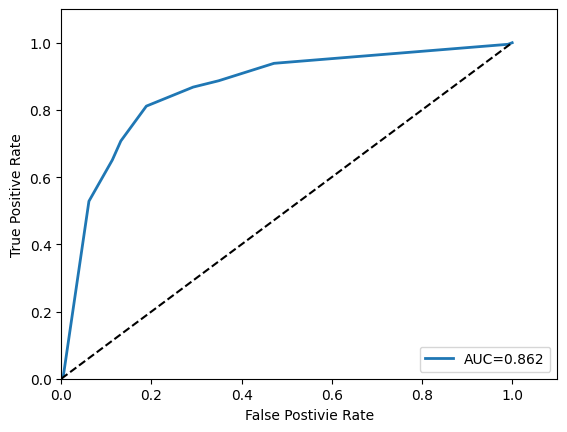

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_dt, tpr_dt, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_dt = auc(fpr_dt, tpr_dt)
print("AUC : ", auc_dt)

plt.plot(fpr_dt, tpr_dt, linewidth = 2,label='AUC=%.3f' % auc_dt)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


#### Model 2: Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

paramGride = dict(
    n_estimators = [50,120,160,200,250],
    max_depth = [1,2,3,5,7,9,11,13],
    min_samples_split = [100,120,150,180,200,300],)

rfModel = RandomForestClassifier()
grid = GridSearchCV(
    rfModel,paramGride,cv = 5,return_train_score = True)
grid = grid.fit(X_train,y_train)

In [165]:
print('best_score：%f'% grid.best_score_)
print('best paramaters:')

for key in grid.best_params_.keys():
    print('%s = %s'%(key,grid.best_params_[key]))

best_score：0.748505
best paramaters:
max_depth = 11
min_samples_split = 100
n_estimators = 120


In [167]:
clf_rf = RandomForestClassifier(n_estimators=120, max_depth=11, min_samples_split=100)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=100, n_estimators=120)

In [169]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = clf_rf.predict(X_test)                                   
y_score_pro = clf_rf.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[ 19  44]
 [  6 143]]
accuracy:0.7641509433962265
precision:0.7647058823529411
recall:0.959731543624161
f1-score:0.8511904761904763


(212, 2)
(212, 2)
AUC :  0.8616278034887859


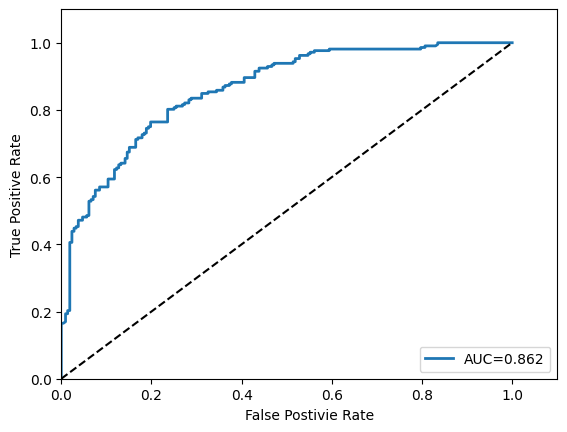

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_rf, tpr_rf, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_rf = auc(fpr_rf, tpr_rf)
print("AUC : ", auc_rf)

plt.plot(fpr_rf, tpr_rf, linewidth = 2,label='AUC=%.3f' % auc_rf)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


#### Model 3: SVM

In [189]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

paramGride = dict(
    gamma = [1e-4, 1e-3, 0.01, 0.1, 1, 10],
    C = [100, 10, 1, 0.1, 1e-2, 1e-3],)

svmModel = SVC()
grid = GridSearchCV(
    svmModel,paramGride,cv = 5,return_train_score = True)
grid = grid.fit(X_train,y_train)

print('best_score：%f'% grid.best_score_)
print('best paramaters:')

for key in grid.best_params_.keys():
    print('%s = %s'%(key,grid.best_params_[key]))

best_score：0.730241
best paramaters:
C = 0.1
gamma = 0.0001


In [190]:
clf_svm = SVC(probability = True)
clf_svm.fit(X_train,y_train)

SVC(probability=True)

In [191]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = clf_svm.predict(X_test)                                   
y_score_pro = clf_svm.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[  6  57]
 [  3 146]]
accuracy:0.7169811320754716
precision:0.7192118226600985
recall:0.9798657718120806
f1-score:0.8295454545454546


(212, 2)
(212, 2)
AUC :  0.7732734069063724


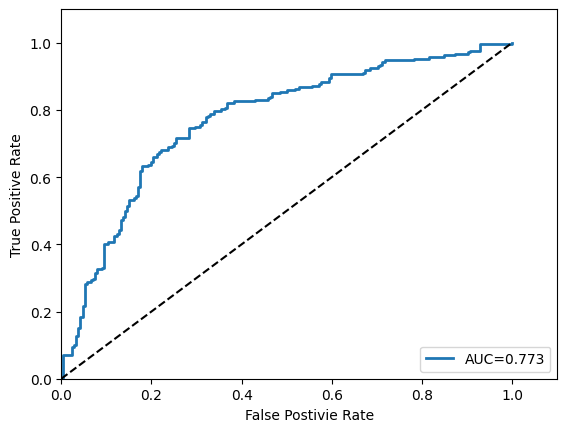

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_svm, tpr_svm, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_svm = auc(fpr_svm, tpr_svm)
print("AUC : ", auc_svm)

plt.plot(fpr_svm, tpr_svm, linewidth = 2,label='AUC=%.3f' % auc_svm)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Model 4: KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

paramGride = dict(
    n_neighbors = [20,30,40,50,60,70,80,100],)

knnModel = KNeighborsClassifier()
grid = GridSearchCV(
    knnModel,paramGride,cv = 5,return_train_score = True,scoring='roc_auc')
grid = grid.fit(X_train,y_train)

print('best_score：%f'% grid.best_score_)
print('best paramaters:')

for key in grid.best_params_.keys():
    print('%s = %s'%(key,grid.best_params_[key]))

best_score：0.677344
best paramaters:
n_neighbors = 40


In [219]:
clf_knn = KNeighborsClassifier(n_neighbors = 40)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [220]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = clf_knn.predict(X_test)                                   
y_score_pro = clf_knn.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[  1  62]
 [  0 149]]
accuracy:0.7075471698113207
precision:0.7061611374407583
recall:1.0
f1-score:0.8277777777777778


(212, 2)
(212, 2)
AUC :  0.7408441616233534


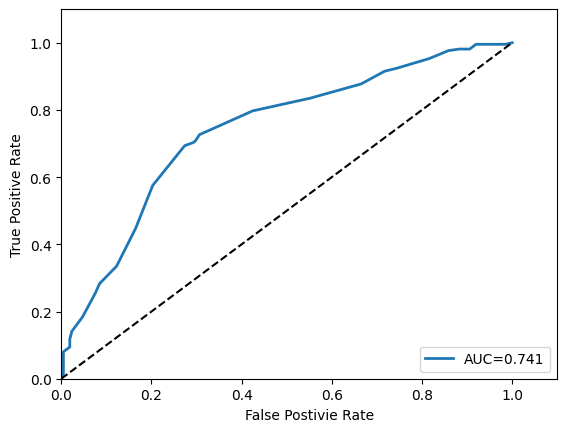

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_knn, tpr_knn, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_knn = auc(fpr_knn, tpr_knn)
print("AUC : ", auc_knn)

plt.plot(fpr_knn, tpr_knn, linewidth = 2,label='AUC=%.3f' % auc_knn)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Model 5: XGBoost

In [210]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

# cv_params = {'n_estimators': np.linspace(100, 1000, 10, dtype=int)} # 200
cv_params = {'n_estimators': np.linspace(150, 250, 11, dtype=int)} # 170
# cv_params = {'max_depth': np.linspace(1, 10, 10, dtype=int)} # 6

xgb_model = xgb.XGBClassifier(**other_params)
gs = GridSearchCV(xgb_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


{'n_estimators': 170}

In [211]:
clf_xgb = xgb.XGBClassifier(n_estimators=170)
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=170,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [212]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = clf_xgb.predict(X_test)                                   
y_score_pro = clf_xgb.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[ 43  20]
 [ 13 136]]
accuracy:0.8443396226415094
precision:0.8717948717948718
recall:0.912751677852349
f1-score:0.8918032786885245


(212, 2)
(212, 2)
AUC :  0.9075516197935208


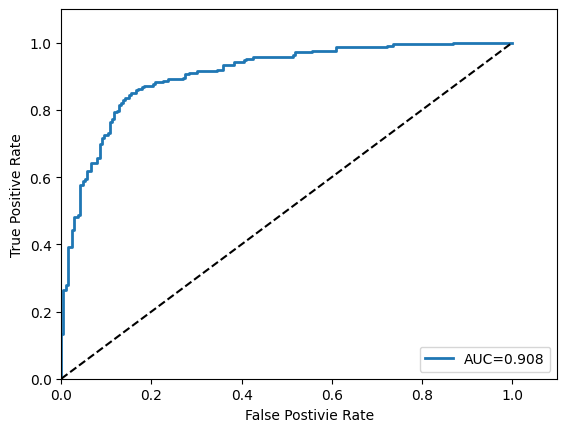

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)

plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Model 6: lightGBM

In [217]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2,3,4,5,6],
    'num_leaves': [15,20,25],
}

gbm = lgb.LGBMClassifier()
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)
gsearch.best_params_

{'max_depth': 4, 'num_leaves': 15}

In [222]:
clf_lgb = lgb.LGBMClassifier(max_depth=4, num_leaves=15)
clf_lgb.fit(X_train,y_train)

LGBMClassifier(max_depth=4, num_leaves=15)

In [223]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = clf_lgb.predict(X_test)                                   
y_score_pro = clf_lgb.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

confusion_matrix
 [[ 44  19]
 [ 17 132]]
accuracy:0.8301886792452831
precision:0.8741721854304636
recall:0.8859060402684564
f1-score:0.8800000000000001


(212, 2)
(212, 2)
AUC :  0.9000978996084016


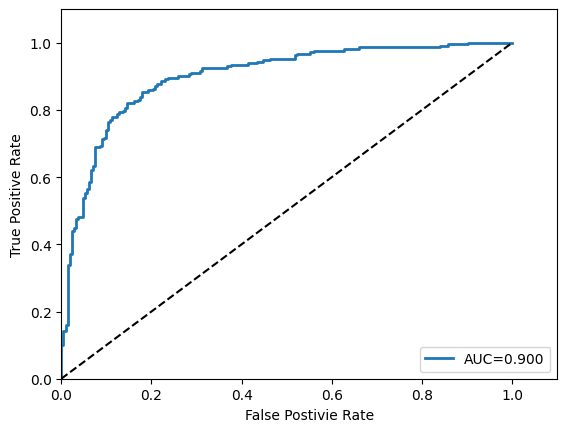

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_lgb, tpr_lgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_lgb = auc(fpr_lgb, tpr_lgb)
print("AUC : ", auc_lgb)

plt.plot(fpr_lgb, tpr_lgb, linewidth = 2,label='AUC=%.3f' % auc_lgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### merge plot

(212, 2)
(212, 2)
AUC :  0.9000978996084016


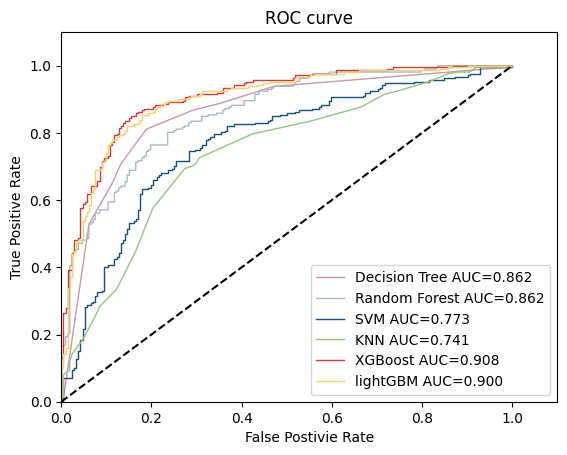

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_lgb, tpr_lgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_lgb = auc(fpr_lgb, tpr_lgb)
print("AUC : ", auc_lgb)

plt.plot(fpr_dt, tpr_dt, linewidth = 1,label='Decision Tree AUC=%.3f' % auc_dt, color='#C497B2')
plt.plot(fpr_rf, tpr_rf, linewidth = 1,label='Random Forest AUC=%.3f' % auc_rf, color='#A9B8C6')
plt.plot(fpr_svm, tpr_svm, linewidth = 1,label='SVM AUC=%.3f' % auc_svm, color='#14517C')
plt.plot(fpr_knn, tpr_knn, linewidth = 1,label='KNN AUC=%.3f' % auc_knn, color='#96C37D')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 1,label='XGBoost AUC=%.3f' % auc_xgb, color='#D8383A')
plt.plot(fpr_lgb, tpr_lgb, linewidth = 1,label='lightGBM AUC=%.3f' % auc_lgb, color='#F3D266')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.savefig('images/preexp.png',dpi=300)
plt.show()